# **Importação dos Frameworks**

In [6]:
#Frameworks

#Modelagem de dados 
import pandas as pd #Dados 
import numpy as np #Matrizes

#Analises gráficas 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 

#Avisos
import warnings
warnings.filterwarnings('ignore')

#Ajustes de configuração 

#Ajustes no pandas 
pd.set_option('display.max_rows', 100) #Limita a quantidade de linhas que será apresentada no ambiente, caso contrário fica alocando muito recurso de memória
pd.set_option('display.max_columns', 50) #Mesma ideia de rows 

#Ajustes no matplot

#Tamanho do gráfico
plt.rcParams ['figure.figsize'] = (15,6) #Por default o matplot apresenta os gráficos muito pequenos, então para facilitar e personalizar estes dados, vamos definir largura e altura.
plt.style.use('seaborn-darkgrid') #Estilo do gráfico


# **Importação dos Dados**

In [7]:
#Ler os dados 
Dados_Livros = pd.read_csv('Books.csv')
Dados_Avaliacao = pd.read_csv('Ratings.csv')
Dados_Usuario = pd.read_csv('Users.csv')

#Dimensão [Linhas, Colunas]
Dados_Livros.shape, Dados_Avaliacao.shape, Dados_Usuario.shape

((271360, 8), (1149780, 3), (278858, 3))

In [8]:
#Primeiras linhas 
Dados_Livros.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
#Info
Dados_Livros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [10]:
#Verificando 
Dados_Avaliacao.head() #Avaliação de 0 a 10

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [11]:
#Info 
Dados_Avaliacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [12]:
#Verificando
Dados_Usuario.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [13]:
#Info
Dados_Usuario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


# **Modelagem dos Dados**

In [17]:
#Cruzamento dos dados

#1º cruzamento
Tab_Cruzada = Dados_Livros.merge(Dados_Avaliacao, how = 'inner', on = 'ISBN')

#2º cruzamento
Tab_Cruzada = Tab_Cruzada.merge(Dados_Usuario, how = 'inner', on = 'User-ID')

In [18]:
Tab_Cruzada.shape

(1031136, 12)

In [19]:
Tab_Cruzada.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN


In [20]:
Tab_Cruzada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031136 non-null  object 
 1   Book-Title           1031136 non-null  object 
 2   Book-Author          1031135 non-null  object 
 3   Year-Of-Publication  1031136 non-null  object 
 4   Publisher            1031134 non-null  object 
 5   Image-URL-S          1031136 non-null  object 
 6   Image-URL-M          1031136 non-null  object 
 7   Image-URL-L          1031132 non-null  object 
 8   User-ID              1031136 non-null  int64  
 9   Book-Rating          1031136 non-null  int64  
 10  Location             1031136 non-null  object 
 11  Age                  753301 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 102.3+ MB


In [33]:
#******************INVESTIGAÇÃO DE RUIDOS NA BASE****************************
#For para encontrar os registros incorretos dentro da coluna "Ano de Publicação"
#(Encontrar tudo que não é número)
#A ideia aqui é encontrar os registros incorretos e passar a linha de registro
#para o iloc (Comando da execução anterior)

  #for Linha in Tab_Cruzada['Year-Of-Publication'].value_counts().index :
  #print (Linha)

  #Tab_Cruzada.loc[Tab_Cruzada['Year-Of-Publication'] == 'DK Publishing inc' ]

#***************************************************************************


#Ajustando o Registro Incorreto
Tab_Cruzada.iloc[287500, 3] = ''
Tab_Cruzada.iloc[352361, 3] = ''
Tab_Cruzada.iloc[467962, 3] = ''
Tab_Cruzada.iloc[469216, 3] = ''

#Converter a coluna ano
Tab_Cruzada['Year-Of-Publication'] = pd.to_numeric(Tab_Cruzada['Year-Of-Publication'])

In [34]:
Tab_Cruzada.dtypes

ISBN                    object
Book-Title              object
Book-Author             object
Year-Of-Publication    float64
Publisher               object
Image-URL-S             object
Image-URL-M             object
Image-URL-L             object
User-ID                  int64
Book-Rating              int64
Location                object
Age                    float64
dtype: object

In [35]:
#Verificando Location utilizando head
Tab_Cruzada['Location'].head(5)

0    stockton, california, usa
1     timmins, ontario, canada
2     timmins, ontario, canada
3     timmins, ontario, canada
4     timmins, ontario, canada
Name: Location, dtype: object

In [36]:
#Verificando Location utilizando tail
Tab_Cruzada['Location'].tail()

1031131                       venice, florida, usa
1031132                   tioga, pennsylvania, usa
1031133                      madrid, madrid, spain
1031134                  grand prairie, texas, usa
1031135    bielefeld, nordrhein-westfalen, germany
Name: Location, dtype: object

In [49]:
#Tecnica de tratamento de texto 
def Extrair_Pais( Regiao ):
  '''
  Função para extrair o nome do país na coluna região
  '''

  #Incluindo a informação 
  Registro = Regiao 

  #Fatiar a informação (cidade, estado, país)
  Registro = Regiao.split(',')

  #Buscar a informação
  Fracao = Registro[-1].upper()
  
  #Retorno da fração
  return Fracao

#Criando a coluna País
Tab_Cruzada['Pais'] = Tab_Cruzada['Location'].apply( Extrair_Pais )

Tab_Cruzada.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,Pais
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0,USA
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN,CANADA
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN,CANADA
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN,CANADA
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN,CANADA


In [50]:
#Nulos 
Tab_Cruzada.isnull().sum()

ISBN                        0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         4
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
User-ID                     0
Book-Rating                 0
Location                    0
Age                    277835
Pais                        0
dtype: int64

In [51]:
#Unicos 
Tab_Cruzada.nunique()

ISBN                   270151
Book-Title             241071
Book-Author            101588
Year-Of-Publication       116
Publisher               16729
Image-URL-S            269842
Image-URL-M            269842
Image-URL-L            269839
User-ID                 92106
Book-Rating                11
Location                22480
Age                       141
Pais                      288
dtype: int64

In [56]:
#Renomear as colunas 
Tab_Cruzada.rename(
    columns = {
        'Book-Title' : 'Titulo',
        'Book-Author' : 'Autor',
        'Year-Of-Publication' : 'Ano_Publicacao',
        'Publisher' : 'Editora',
        'User-ID' : 'Id_Cliente',
        'Book-Rating' : 'Avaliacao',
        'Location' : 'Localizacao',
        'Age' : 'Idade'
    }, inplace = True

)

#Verificar alterações 
Tab_Cruzada.columns

Index(['ISBN', 'Titulo', 'Autor', 'Ano_Publicacao', 'Editora', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L', 'Id_Cliente', 'Avaliacao', 'Localizacao',
       'Idade', 'Pais'],
      dtype='object')

# **Data Visualization - Exploração**

In [57]:
# Análise descritiva
Tab_Cruzada.describe()

,Ano_Publicacao,Id_Cliente,Avaliacao,Idade
count,1.031132e+06,1.031136e+06,1.031136e+06,753301.000000
mean,1.968195e+03,1.405945e+05,2.839051e+00,37.397648
std,2.311015e+02,8.052466e+04,3.854157e+00,14.098254
min,0.000000e+00,2.000000e+00,0.000000e+00,0.000000
25%,1.992000e+03,7.041500e+04,0.000000e+00,28.000000
50%,1.997000e+03,1.412100e+05,0.000000e+00,35.000000
75%,2.001000e+03,2.114260e+05,7.000000e+00,45.000000
max,2.050000e+03,2.788540e+05,1.000000e+01,244.000000


In [60]:
#Remover avaliações zeradas 
Tab_Cruzada = Tab_Cruzada.loc[Tab_Cruzada['Avaliacao'] > 0]

#Verificar 
Tab_Cruzada.isnull().sum(), Tab_Cruzada.shape

(ISBN                   0
 Titulo                 0
 Autor                  1
 Ano_Publicacao         1
 Editora                2
 Image-URL-S            0
 Image-URL-M            0
 Image-URL-L            1
 Id_Cliente             0
 Avaliacao              0
 Localizacao            0
 Idade             114221
 Pais                   0
 dtype: int64, (383842, 13))

In [61]:
#Verificar coluna de avaliação 
Tab_Cruzada['Avaliacao'].describe()

count    383842.000000
mean          7.626701
std           1.841339
min           1.000000
25%           7.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: Avaliacao, dtype: float64

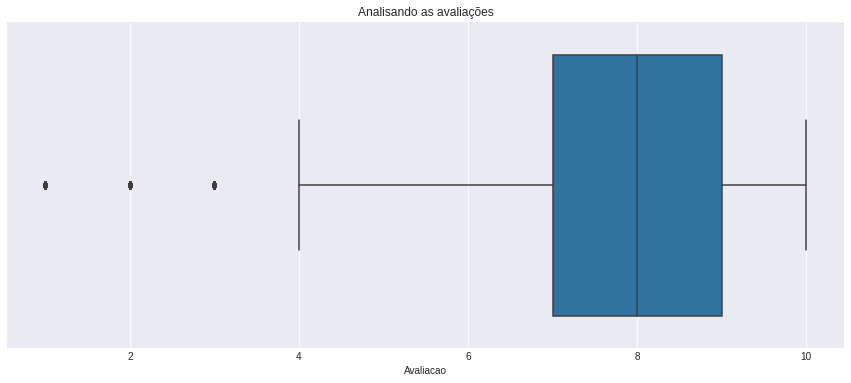

In [62]:
# Analise gráfica 
plt.title('Analisando as avaliações')
sns.boxplot( data = Tab_Cruzada , x= 'Avaliacao' );

In [64]:
# Analise - Entender quais livros possuem as melhores avaliações?
Analise = Tab_Cruzada.groupby( by=['Titulo'] ).agg(
    Quantidade = ('Titulo','count'),
    Media = ('Avaliacao', 'mean'),
    Max = ('Avaliacao', 'max'),
    Min = ('Avaliacao', 'min'),
    Mediana = ('Avaliacao', 'median')

)

#Verificar a análise
Analise.head(20)

,Quantidade,Media,Max,Min,Mediana
Titulo,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",1,9.000000,9,9,9.0
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,8.000000,8,8,8.0
Dark Justice,1,10.000000,10,10,10.0
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",7,7.142857,10,1,7.0
Final Fantasy Anthology: Official Strategy Guide (Brady Games),2,10.000000,10,10,10.0
Flight of Fancy: American Heiresses (Zebra Ballad Romance),1,8.000000,8,8,8.0
Garfield Bigger and Better (Garfield (Numbered Paperback)),1,7.000000,7,7,7.0
God's Little Promise Book,1,9.000000,9,9,9.0
"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",4,8.000000,10,7,7.5


In [65]:
#Verificar livros que tiveram mais avaliações 
Analise.sort_values('Quantidade', ascending = False).head()

,Quantidade,Media,Max,Min,Mediana
Titulo,,,,,
The Lovely Bones: A Novel,707,8.185290,10,1,8.0
Wild Animus,581,4.390706,10,1,4.0
The Da Vinci Code,494,8.439271,10,1,9.0
The Secret Life of Bees,406,8.477833,10,2,9.0
The Nanny Diaries: A Novel,393,7.437659,10,1,8.0


In [66]:
#Verificar livros com as melhores notas 
Analise.sort_values(['Quantidade' , 'Media'], ascending = False).head()

,Quantidade,Media,Max,Min,Mediana
Titulo,,,,,
The Lovely Bones: A Novel,707,8.185290,10,1,8.0
Wild Animus,581,4.390706,10,1,4.0
The Da Vinci Code,494,8.439271,10,1,9.0
The Secret Life of Bees,406,8.477833,10,2,9.0
The Nanny Diaries: A Novel,393,7.437659,10,1,8.0


In [70]:
# Analise Quantidade x Avaliação (Visual)
px.scatter (
    #Dados 
    data_frame = Analise,
    #Parametros para acessar as colunas que eu desejo
    x = 'Quantidade', y = 'Media',
    #Titulo do gráfico 
    title = 'Media x Quantidade - Titulos',
    #Upgrade
    #marginal_y = 'rug', marginal_x = 'histogram' 
)


In [71]:
#Analisar correlação dos dados 
Analise.corr()

,Quantidade,Media,Max,Min,Mediana
Quantidade,1.000000,0.018880,0.175572,-0.251497,0.036604
Media,0.018880,1.000000,0.889722,0.842385,0.989839
Max,0.175572,0.889722,1.000000,0.530760,0.887792
Min,-0.251497,0.842385,0.530760,1.000000,0.804023
Mediana,0.036604,0.989839,0.887792,0.804023,1.000000


In [72]:
# Analise 
Analise['Quantidade'].describe()

count    135567.000000
mean          2.831382
std           9.135691
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         707.000000
Name: Quantidade, dtype: float64

In [78]:
# Criar uma divisão das quantidades para ficar mais ajustado 

def Classificacao_Quantidade (Quantidade):
  '''
    Agrupar a quantidade
  '''

  if int (Quantidade) <= 5:
    return '1-5 Avaliações'
  elif int (Quantidade) <= 10:
    return '6-10 Avaliações'
  elif int (Quantidade) <= 50:
    return '11-50 avaliações'
  elif int (Quantidade) <= 100:
    return '51-100 avaliações'
  else:
    return '> 101 avaliações'

# Aplicação
Pizza = Analise['Quantidade'].apply( Classificacao_Quantidade ).value_counts( normalize=True)

# Transformar em DataFrame (Reset index serve para transformar os 2 valores em 2 colunas)
Pizza = pd.DataFrame ( Pizza ).reset_index()

# Plot 
px.pie(
    #Dados 
    data_frame = Pizza,
    #Parâmetros
    names = 'index', values = 'Quantidade',
    #Titulo
    title = 'Divisão das quantidades'
)



In [79]:
#Verificando 
Pizza

,index,Quantidade
0,1-5 Avaliações,0.920010
1,6-10 Avaliações,0.042783
2,11-50 avaliações,0.032589
3,51-100 avaliações,0.003201
4,> 101 avaliações,0.001416


In [84]:
# Verificando anos de publicação (Value_counts serve para agrupar a quantidade de publicações por ano)
Analise_Ano = Tab_Cruzada['Ano_Publicacao'].value_counts().sort_index().reset_index()

#Verificando resultado do agrupamento
Analise_Ano.head()



,index,Ano_Publicacao
0,0.0,5783
1,1376.0,1
2,1378.0,1
3,1806.0,1
4,1900.0,1


<BarContainer object of 105 artists>

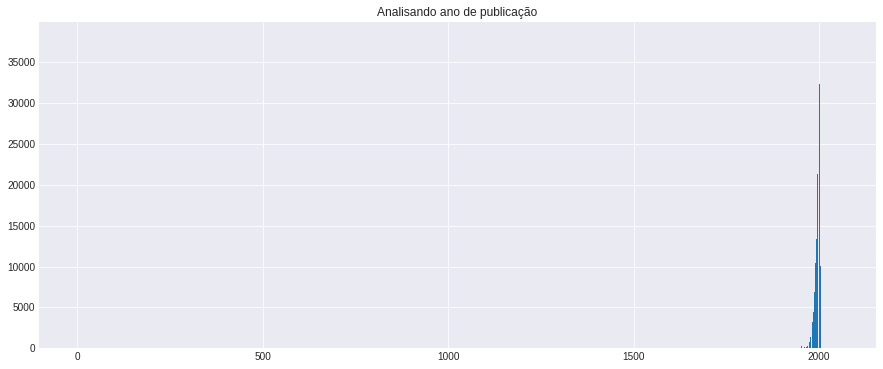

In [85]:
# Plot
plt.title('Analisando ano de publicação')
plt.bar(Analise_Ano['index'], Analise_Ano['Ano_Publicacao'])